In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#提取数据集
url = 'G:\DownLoad\data\monthly_index.csv'
df_month = pd.read_csv(url)

In [3]:
#查看数据集
df_month.head(4)

,year_month,sales_amount,customer_number
0,2010-01,7191240,6885
1,2010-02,6253663,6824
2,2010-03,6868320,7834
3,2010-04,7147388,8552


In [4]:
#将字符串转换为日期datetime类型的数据
df_month['year_month'] = df_month['year_month'].astype(str)
df_month['time'] = pd.to_datetime(df_month['year_month'],format='%Y-%m')
#查看数据统计量
df_month.describe()

,sales_amount,customer_number
count,1.200000e+02,120.000000
mean,4.802592e+07,48541.266667
std,2.648395e+07,27007.513516
min,6.253663e+06,6824.000000
25%,2.500194e+07,24536.250000
50%,4.976176e+07,46641.500000
75%,7.047537e+07,73276.500000
max,1.044011e+08,99507.000000


In [5]:
df_month.head(4)

,year_month,sales_amount,customer_number,time
0,2010-01,7191240,6885,2010-01-01
1,2010-02,6253663,6824,2010-02-01
2,2010-03,6868320,7834,2010-03-01
3,2010-04,7147388,8552,2010-04-01


In [6]:
#查看df_month中是否有缺失值
print(df_month.isnull().any(),'\n')
#显示有缺失值的地方
print(df_month[df_month.isnull().values==True])
#全为false，说明没有缺失值

year_month         False
sales_amount       False
customer_number    False
time               False
dtype: bool 

Empty DataFrame
Columns: [year_month, sales_amount, customer_number, time]
Index: []


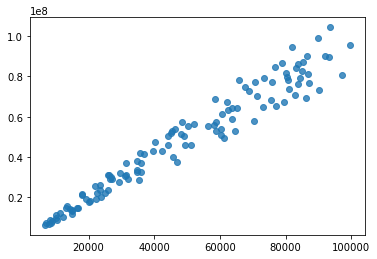

In [7]:
plt.scatter(df_month['customer_number'], df_month['sales_amount'], alpha=0.8)

In [8]:
#异常值
s = df_month.describe()

q1 = s.loc['25%'][0]
q3 = s.loc['75%'][0]
iqr = q3 - q1
mi = q1 - 1.5 * iqr
ma = q3 + 1.5 * iqr
error = df_month[(df_month['customer_number'] < mi) | (df_month['customer_number'] > ma)]
print(error)
print('异常值共%i条' % len(error))

Empty DataFrame
Columns: [year_month, sales_amount, customer_number, time]
Index: []
异常值共0条


     customer_number  sales_amount
0          -1.548863     -1.548330
1          -1.551131     -1.583880
2          -1.513577     -1.560574
3          -1.486880     -1.549993
4          -1.501047     -1.489002
..               ...           ...
115         1.803986      1.232412
116         1.413612      1.598799
117         1.895007      1.809554
118         1.363602      1.477706
119         1.676117      2.137579

[120 rows x 2 columns]


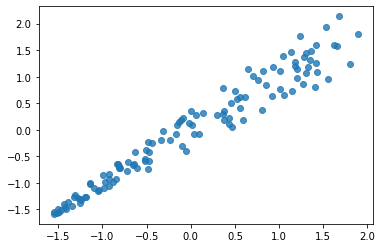

In [9]:
#选择用Z-score将数据标准化

def ZscoreNormalization(x):
    x = (x - np.mean(x))/np.std(x)
    return x

Z_views = pd.DataFrame()
Z_views['customer_number'] = ZscoreNormalization(df_month['customer_number'])
Z_views['sales_amount'] = ZscoreNormalization(df_month['sales_amount'])
print(Z_views)
plt.scatter(Z_views['customer_number'], Z_views['sales_amount'], alpha=0.8)

In [10]:
#PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(Z_views)
new_month = pca.fit_transform(Z_views)
print(pca.explained_variance_ratio_)
#重构
reconMat = pca.inverse_transform(new_month)
print(new_month)

#print(new_month)



[0.98763445]
[[-2.19004581]
 [-2.21678734]
 [-2.17375298]
 [-2.14739339]
 [-2.11428328]
 [-2.10472292]
 [-2.03235018]
 [-1.93617195]
 [-2.00335365]
 [-2.04890651]
 [-1.80022473]
 [-1.96340948]
 [-1.82879824]
 [-1.80012198]
 [-1.80245453]
 [-1.74736698]
 [-1.85791989]
 [-1.81036624]
 [-1.52122921]
 [-1.55079272]
 [-1.73849322]
 [-1.52193274]
 [-1.56143431]
 [-1.46555897]
 [-1.54412008]
 [-1.30602896]
 [-1.40219721]
 [-1.2500704 ]
 [-1.32069155]
 [-1.38375587]
 [-1.31642716]
 [-1.06665527]
 [-1.04909868]
 [-1.25199522]
 [-1.08118904]
 [-1.04769633]
 [-1.04830665]
 [-1.05444853]
 [-0.92762852]
 [-0.94707778]
 [-0.73988459]
 [-0.93221762]
 [-0.77918503]
 [-0.90953335]
 [-0.63623815]
 [-0.86243677]
 [-0.4896952 ]
 [-0.75180486]
 [-0.62276909]
 [-0.5061304 ]
 [-0.74981537]
 [-0.30021878]
 [-0.04676762]
 [-0.17248556]
 [-0.37212152]
 [ 0.01006496]
 [-0.29087182]
 [-0.24380447]
 [-0.31832951]
 [ 0.09218762]
 [ 0.0176855 ]
 [ 0.2540575 ]
 [ 0.04947054]
 [-0.03381808]
 [ 0.07137692]
 [ 0.0737908

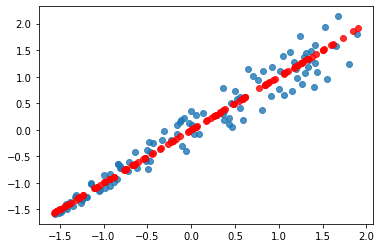

In [11]:
plt.scatter(Z_views['customer_number'], Z_views['sales_amount'], alpha=0.8)
plt.scatter(reconMat[:,0], reconMat[:,1], alpha=0.8,color = 'red')